# Test script: OTPC_simul

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%run ../OTPC_simul.py

##  Run

#### Track generation

In [3]:
print('track generation...')
x,y,z,t,DeltaE=OTPC_simul.GenStraightTrack(z0,theta0, phi0, Rpart, Epart/Rpart, Mpart, nsteps)
print('...done')

track generation...
...done


#### Initial TPC response

In [4]:
print('calculating primary TPC response...')
global Wi, Ws, tau1, tau2, Ratio12, FanoQ, FanoS

Wi=54            #[ev] From "Properties of some gas mixtures used in tracking detectors", Archana Sharma, GSI Darmstadt, 1997
Ws=500           #[ev] At P~1 bar, and E<60V/cm/bar. From Morozov's: https://doi.org/10.1016/j.nima.2010.07.001 , https://doi.org/10.1016/j.nimb.2010.01.012.
tau1=2           #[ns] Morozov/Margato SECONDARY SCINTILLATION (only the dominant UV part -visible would be in between): doi: 10.1088/1748-0221/8/07/p07008.
tau2=40          #[ns] Morozov/Margato SECONDARY SCINTILLATION (only the dominant UV part -visible would be in between): doi: 10.1088/1748-0221/8/07/p07008.
Ratio12=0.35     #     Morozov/Margato SECONDARY SCINTILLATION (only the dominant UV part -visible would be in between): doi: 10.1088/1748-0221/8/07/p07008.
FanoQ=0.2        #     Typical Fano factor for ionization    (unknown)
FanoS=0.2        #     Typical Fano factor for scintillation (unknown)

xe, ye, ze, te, xPh, yPh, zPh,tPh, LPh=OTPC_simul.TPCprimaryResponse(x,y,z,t,DeltaE)
print('...done')

calculating primary TPC response...
...done


#### TPC Drift

In [5]:
print('calculating TPC drift...')
xeA,yeA,zeA,teA =OTPC_simul.TPCdrift(xe,ye,ze,te)
print('...done')

calculating TPC drift...
...done


#### TPC Anode

In [6]:
print('calculating TPC anode response...')
xePh,yePh, zePh, tePh, WePh=OTPC_simul.TPCanode(xeA,yeA,zeA,teA)
print('...done')

calculating TPC anode response...
...done


#### PMT Response

In [7]:
print('calculating PMT response...')
#PML_wvf, PMR_wvf, PMU_wvf, PMD_wvf, T_wvf, tPML_S1, tPMR_S1, tPMU_S1, tPMD_S1,tPML_S2, tPMR_S2, tPMU_S2, tPMD_S2=OTPC_simul.PMTresponse(xePh, yePh, zePh, tePh, WePh, xPh, yPh, zPh, tPh)
print('...done')

calculating PMT response...
...done


#### CMOS Response

In [8]:
print('calculating CMOS response...')
NphXY=OTPC_simul.CMOSresponse(xePh,yePh,WePh)
print('...done')

calculating CMOS response...
...done


## Plots

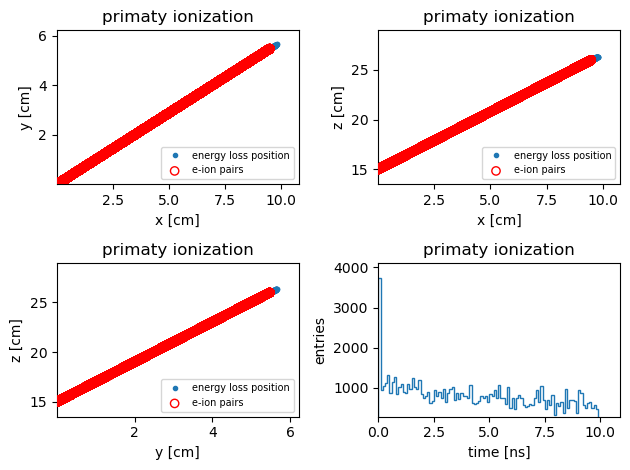

In [9]:
#Draw ionization centers
eps=1e-4

fig, axs=plt.subplots(2,2)

axs[0,0].plot(x,y,'.', label='energy loss position')
axs[0,0].scatter(xe,ye, facecolors='none', edgecolors='red',label='e-ion pairs', zorder=3 )
axs[0,0].set_title('primaty ionization')
axs[0,0].set_xlabel('x [cm]')
axs[0,0].set_ylabel('y [cm]')
axs[0,0].set_xlim([0.9*min(x),1.1*max(x)+eps])
axs[0,0].set_ylim([0.9*min(y),1.1*max(y)+eps])
axs[0,0].legend(fontsize=7, loc='lower right')


axs[0,1].plot(x,z,'.', label='energy loss position')
axs[0,1].scatter(xe,ze,facecolors='none', edgecolors='red',label='e-ion pairs', zorder=3 )
axs[0,1].set_title('primaty ionization')
axs[0,1].set_xlabel('x [cm]')
axs[0,1].set_ylabel('z [cm]')
axs[0,1].set_xlim([0.9*min(x),1.1*max(x)+eps])
axs[0,1].set_ylim([0.9*min(z),1.1*max(z)+eps])
axs[0,1].legend(fontsize=7, loc='lower right')


axs[1,0].plot(y,z,'.', label='energy loss position')
axs[1,0].scatter(ye,ze,facecolors='none', edgecolors='red',label='e-ion pairs', zorder=3 )
axs[1,0].set_title('primaty ionization')
axs[1,0].set_xlabel('y [cm]')
axs[1,0].set_ylabel('z [cm]')
axs[1,0].set_xlim([0.9*min(y),1.1*max(y)+eps])
axs[1,0].set_ylim([0.9*min(z),1.1*max(z)+eps])
axs[1,0].legend(fontsize=7, loc='lower right')


a,b=np.histogram(te,np.arange(0,10,0.1))
axs[1,1].stairs(a ,b)
axs[1,1].set_title('primaty ionization')
axs[1,1].set_xlabel('time [ns]')
axs[1,1].set_ylabel('entries')
axs[1,1].set_xlim([0.9*min(b),1.1*max(b)+eps])
axs[1,1].set_ylim([0.9*min(a),1.1*max(a)+eps])


fig.tight_layout()

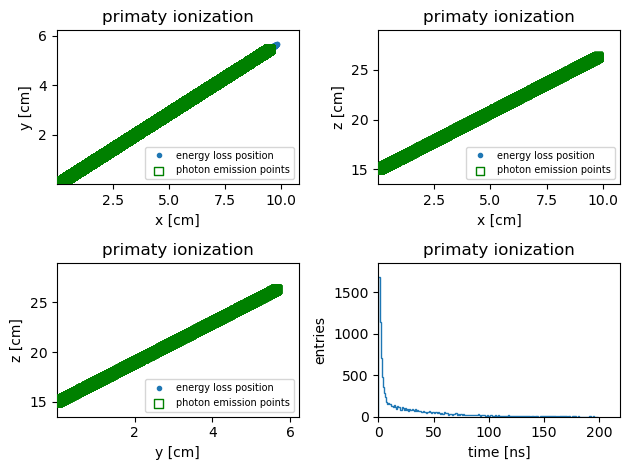

In [10]:
#Draw Photon emission centers

fig, axs=plt.subplots(2,2)

axs[0,0].plot(x,y,'.', label='energy loss position')
axs[0,0].scatter(xe,ye,marker='s', facecolors='none', edgecolors='g',label='photon emission points', zorder=3 )
axs[0,0].set_title('primaty ionization')
axs[0,0].set_xlabel('x [cm]')
axs[0,0].set_ylabel('y [cm]')
axs[0,0].set_xlim([0.9*min(x),1.1*max(x)+eps])
axs[0,0].set_ylim([0.9*min(y),1.1*max(y)+eps])
axs[0,0].legend(fontsize=7, loc='lower right')


axs[0,1].plot(x,z,'.', label='energy loss position')
axs[0,1].scatter(xPh,zPh,facecolors='none',marker='s', edgecolors='g',label='photon emission points', zorder=3 )
axs[0,1].set_title('primaty ionization')
axs[0,1].set_xlabel('x [cm]')
axs[0,1].set_ylabel('z [cm]')
axs[0,1].set_xlim([0.9*min(x),1.1*max(x)+eps])
axs[0,1].set_ylim([0.9*min(z),1.1*max(z)+eps])
axs[0,1].legend(fontsize=7, loc='lower right')


axs[1,0].plot(y,z,'.', label='energy loss position')
axs[1,0].scatter(yPh,zPh,marker='s',facecolors='none', edgecolors='g',label='photon emission points', zorder=3 )
axs[1,0].set_title('primaty ionization')
axs[1,0].set_xlabel('y [cm]')
axs[1,0].set_ylabel('z [cm]')
axs[1,0].set_xlim([0.9*min(y),1.1*max(y)+eps])
axs[1,0].set_ylim([0.9*min(z),1.1*max(z)+eps])
axs[1,0].legend(fontsize=7, loc='lower right')


a,b=np.histogram(tPh,np.arange(0,200,1))
axs[1,1].stairs(a ,b)
axs[1,1].set_title('primaty ionization')
axs[1,1].set_xlabel('time [ns]')
axs[1,1].set_ylabel('entries')
axs[1,1].set_xlim([0.9*min(b),1.1*max(b)+eps])
axs[1,1].set_ylim([0.9*min(a),1.1*max(a)+eps])
#axs[1,1].set_yscale('linear')

fig.tight_layout()

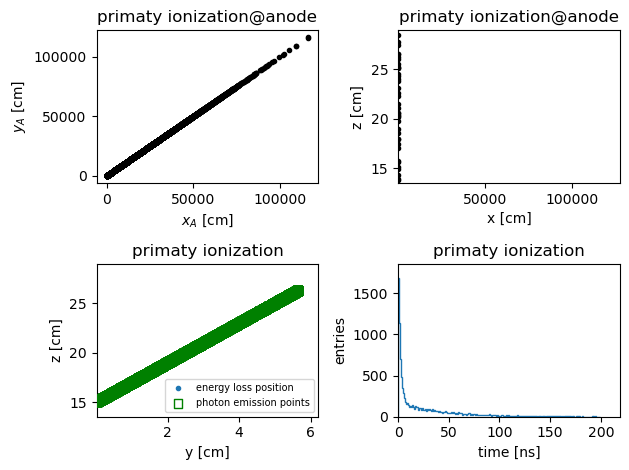

In [11]:
#Draw Photon emission centers

vd=3.5

fig, axs=plt.subplots(2,2)

axs[0,0].scatter(xeA,yeA,marker='.', color='k')
axs[0,0].set_title('primaty ionization@anode')
axs[0,0].set_xlabel('$x_A$ [cm]')
axs[0,0].set_ylabel('$y_A$ [cm]')
#axs[0,0].set_xlim([0.9*min(xeA),1.1*max(xeA)+eps])
#axs[0,0].set_ylim([0.9*min(yeA),1.1*max(yeA)+eps])


axs[0,1].scatter(xeA,vd*teA,marker='.',color='k' )
axs[0,1].set_title('primaty ionization@anode')
axs[0,1].set_xlabel('x [cm]')
axs[0,1].set_ylabel('z [cm]')
axs[0,1].set_xlim([0.9*min(xeA),1.1*max(xeA)+eps])
axs[0,1].set_ylim([0.9*min(z),1.1*max(z)+eps])


axs[1,0].plot(y,z,'.', label='energy loss position')
axs[1,0].scatter(yPh,zPh,marker='s',facecolors='none', edgecolors='g',label='photon emission points', zorder=3 )
axs[1,0].set_title('primaty ionization')
axs[1,0].set_xlabel('y [cm]')
axs[1,0].set_ylabel('z [cm]')
axs[1,0].set_xlim([0.9*min(y),1.1*max(y)+eps])
axs[1,0].set_ylim([0.9*min(z),1.1*max(z)+eps])
axs[1,0].legend(fontsize=7, loc='lower right')


a,b=np.histogram(tPh,np.arange(0,200,1))
axs[1,1].stairs(a ,b)
axs[1,1].set_title('primaty ionization')
axs[1,1].set_xlabel('time [ns]')
axs[1,1].set_ylabel('entries')
axs[1,1].set_xlim([0.9*min(b),1.1*max(b)+eps])
axs[1,1].set_ylim([0.9*min(a),1.1*max(a)+eps])
#axs[1,1].set_yscale('linear')

fig.tight_layout()

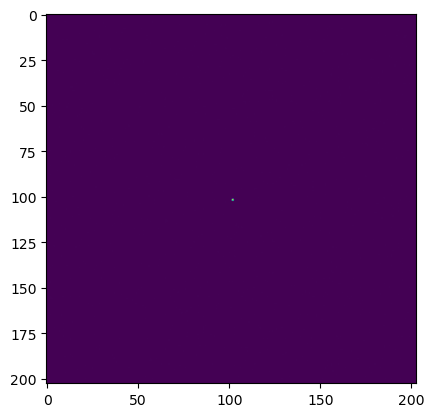

In [18]:
plt.imshow(NphXY)

13.379445391058233